In [ ]:
# importing required libraries
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Load preprocessed data
train_df = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\processed\train_df_processed.csv")
test_df = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\processed\test_df_processed.csv")

print("Data loaded successfully! Ready for model prototyping.")

Data loaded successfully! Ready for model prototyping.


In [3]:
x_train=train_df.drop(['attack_cat_encoded'], axis=1)
y_train=train_df["attack_cat_encoded"]

In [4]:
# Take a sample (e.g., 50k rows)
x_sample = x_train.sample(n=50000, random_state=42)
y_sample = y_train.loc[x_sample.index]

In [5]:
discrete_features = x_train.dtypes == int

def mi_score_maker(x, y, discrete_features):
    scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': x.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

# Example usage
mi_scores_df = mi_score_maker(x_sample, y_sample, discrete_features)


In [6]:
mi_scores_df

,Features,Scores
0,Ltime,5.873156
1,sport,5.847144
2,Stime,5.818253
3,dsport,1.252192
4,dbytes,0.365452
5,sbytes,0.358455
6,dmeansz,0.217720
7,Label,0.201027
8,ct_state_ttl,0.172500
9,sttl,0.172105


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_sample_scaled = pd.DataFrame(scaler.fit_transform(x_sample), columns=x_sample.columns)

In [8]:
def chi2_score_maker(x, y):
    # Chi-square test (requires non-negative values)
    chi2_scores, p_values = chi2(x, y)
    
    # Build DataFrame
    df = pd.DataFrame({
        'Features': x.columns,
        'Chi2_Scores': chi2_scores,
        'p_values': p_values
    })
    
    # Sort by Chi2 score (descending)
    df = df.sort_values(['Chi2_Scores'], ascending=False).reset_index(drop=True)
    return df

# Example usage
chi2_scores_df = chi2_score_maker(x_sample_scaled, y_sample)

In [9]:
chi2_scores_df

,Features,Chi2_Scores,p_values
0,Label,47620.000000,0.000000e+00
1,ct_state_ttl,7623.127690,0.000000e+00
2,sttl,7364.680140,0.000000e+00
3,dttl,4052.209908,0.000000e+00
4,ct_dst_sport_ltm,2385.373760,0.000000e+00
5,ct_dst_src_ltm,1786.133562,0.000000e+00
6,ct_src_dport_ltm,1711.819623,0.000000e+00
7,ackdat,617.923034,2.976260e-127
8,ct_srv_dst,599.345562,2.893817e-123
9,Ltime,591.242944,1.586034e-121


In [10]:
def anova_score_maker(x, y):
    # ANOVA F-test
    f_scores, p_values = f_classif(x, y)
    
    # Build DataFrame
    df = pd.DataFrame({
        'Features': x.columns,
        'F_Scores': f_scores,
        'p_values': p_values
    })
    
    # Sort by F score (descending)
    df = df.sort_values(['F_Scores'], ascending=False).reset_index(drop=True)
    return df

# Example usage
anova_scores_df = anova_score_maker(x_sample, y_sample)

c:\Users\arind\OneDrive\Desktop\Network IDS\network-ids_env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [11]:
anova_scores_df

,Features,F_Scores,p_values
0,Label,inf,0.000000e+00
1,sttl,9777.252737,0.000000e+00
2,ct_state_ttl,4637.366154,0.000000e+00
3,dttl,3655.062720,0.000000e+00
4,ct_dst_sport_ltm,1630.042053,0.000000e+00
5,ct_dst_src_ltm,1536.191331,0.000000e+00
6,ct_src_dport_ltm,1198.963960,0.000000e+00
7,ct_srv_dst,771.047274,0.000000e+00
8,ct_srv_src,697.768253,0.000000e+00
9,tcprtt,696.411849,0.000000e+00


Comparison of Feature Scores:
                     Features    Scores   Chi2_Scores     F_Scores
0                       Ltime  5.873156    591.242944   141.829254
1                       sport  5.847144     60.894178    38.407713
2                       Stime  5.818253    591.239598   141.829094
3                      dsport  1.252192    457.963704   121.798117
4                      dbytes  0.365452      9.442724    11.035460
5                      sbytes  0.358455     46.534982    46.937593
6                     dmeansz  0.217720    301.789547   147.676921
7                       Label  0.201027  47620.000000          inf
8                ct_state_ttl  0.172500   7623.127690  4637.366154
9                        sttl  0.172105   7364.680140  9777.252737
10                      Dpkts  0.163257     13.202435    24.562147
11                       dttl  0.155918   4052.209908  3655.062720
12                    smeansz  0.138317    118.815564    73.773740
13                      Sload  0

<Figure size 1200x800 with 0 Axes>

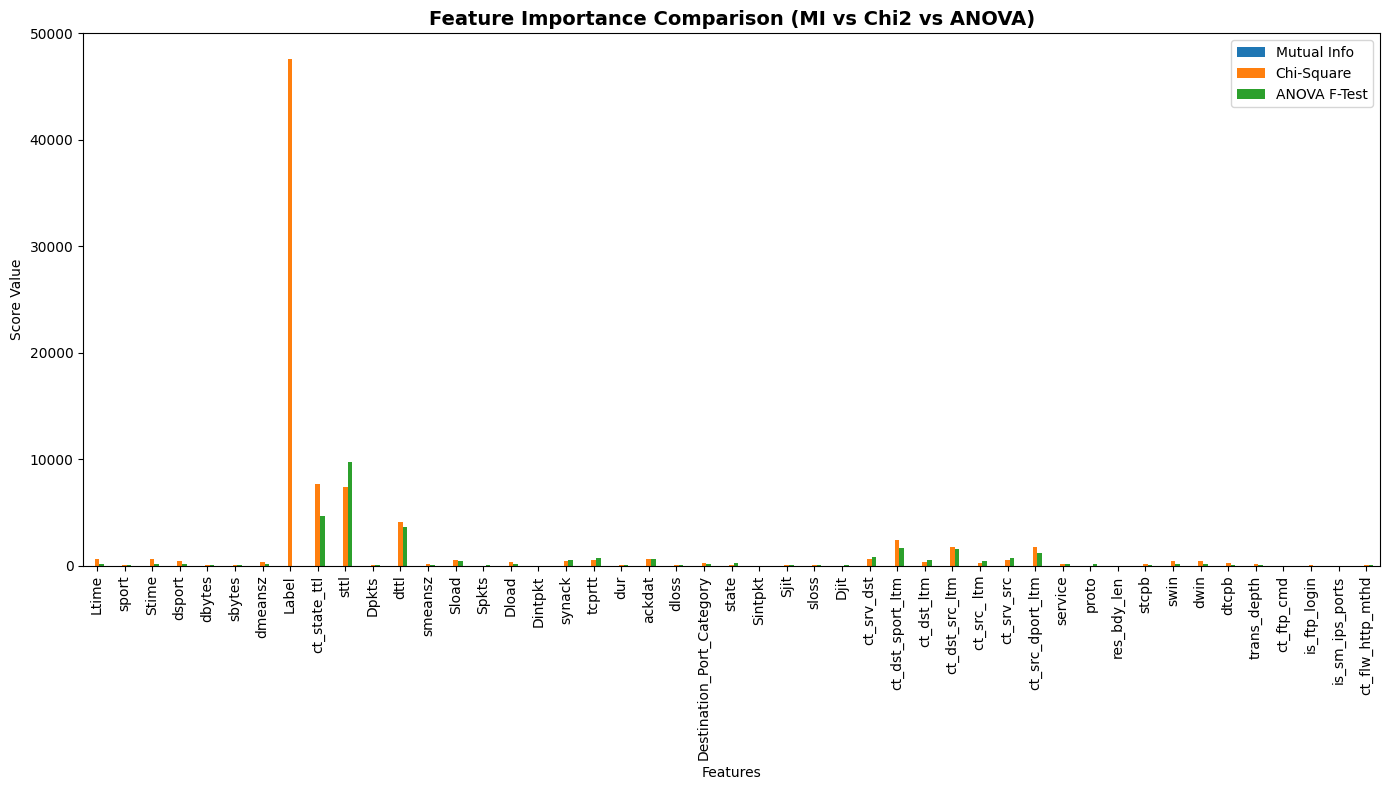

In [12]:
# Merge all three score DataFrames
comparison_df = mi_scores_df.merge(
    chi2_scores_df[['Features', 'Chi2_Scores']], on='Features', how='outer'
).merge(
    anova_scores_df[['Features', 'F_Scores']], on='Features', how='outer'
)

# Fill NaNs with 0 (in case some scores missing)
comparison_df = comparison_df.fillna(0)

# Sort by MI scores (or choose another metric)
comparison_df = comparison_df.sort_values('Scores', ascending=False).reset_index(drop=True)

print("Comparison of Feature Scores:")
print(comparison_df)

# ---- Plot comparison ----
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
comparison_df.set_index('Features')[['Scores', 'Chi2_Scores', 'F_Scores']].plot(
    kind='bar', figsize=(14, 8)
)
plt.title("Feature Importance Comparison (MI vs Chi2 vs ANOVA)", fontsize=14, fontweight="bold")
plt.ylabel("Score Value")
plt.xlabel("Features")
plt.legend(["Mutual Info", "Chi-Square", "ANOVA F-Test"])
plt.tight_layout()
plt.show()


In [13]:
# ---- Get Top 30 Features by Each Method ----
top30_mi     = mi_scores_df.head(30)['Features'].tolist()
top30_chi2   = chi2_scores_df.head(30)['Features'].tolist()
top30_anova  = anova_scores_df.head(30)['Features'].tolist()

print("Top 30 MI Features:", top30_mi)
print("Top 30 Chi2 Features:", top30_chi2)
print("Top 30 ANOVA Features:", top30_anova)

# ---- Option 1: Intersection (features common to all three) ----
common_top30 = list(set(top30_mi) & set(top30_chi2) & set(top30_anova))
print("\nCommon Features in all three methods:", common_top30)

# ---- Option 2: Union (take any feature appearing in top30 of any method) ----
union_top30 = list(set(top30_mi) | set(top30_chi2) | set(top30_anova))
print("\nAll Features from Top 30 of at least one method:", union_top30)


Top 30 MI Features: ['Ltime', 'sport', 'Stime', 'dsport', 'dbytes', 'sbytes', 'dmeansz', 'Label', 'ct_state_ttl', 'sttl', 'Dpkts', 'dttl', 'smeansz', 'Sload', 'Spkts', 'Dload', 'Dintpkt', 'synack', 'tcprtt', 'dur', 'ackdat', 'dloss', 'Destination_Port_Category', 'state', 'Sintpkt', 'Sjit', 'sloss', 'Djit', 'ct_srv_dst', 'ct_dst_sport_ltm']
Top 30 Chi2 Features: ['Label', 'ct_state_ttl', 'sttl', 'dttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'ackdat', 'ct_srv_dst', 'Ltime', 'Stime', 'tcprtt', 'ct_srv_src', 'Sload', 'synack', 'dsport', 'swin', 'dwin', 'Dload', 'dmeansz', 'ct_dst_ltm', 'Destination_Port_Category', 'ct_src_ ltm', 'dtcpb', 'stcpb', 'trans_depth', 'smeansz', 'service', 'state', 'sport']
Top 30 ANOVA Features: ['Label', 'sttl', 'ct_state_ttl', 'dttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'ct_srv_dst', 'ct_srv_src', 'tcprtt', 'ackdat', 'ct_dst_ltm', 'synack', 'Sload', 'ct_src_ ltm', 'state', 'swin', 'dwin', 'dmeansz', 'Ltime', 'Stime', '

C:\Users\arind\AppData\Local\Temp\ipykernel_14628\1129201067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


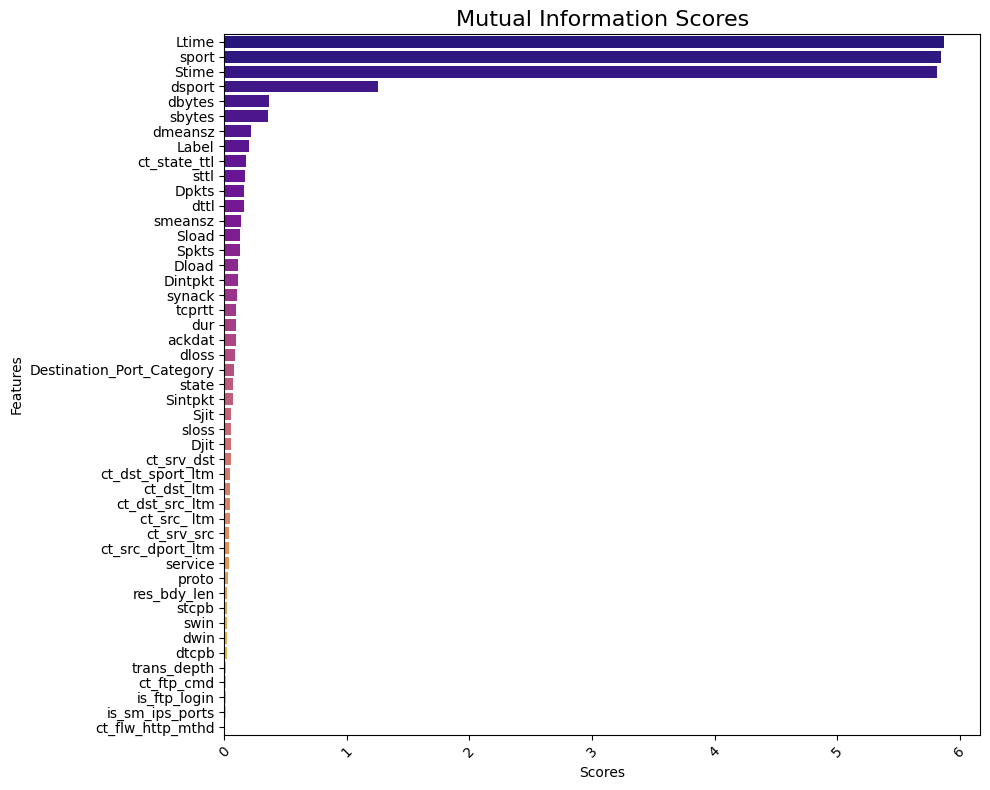

In [16]:
plt.figure(figsize=(10, 8))
# Create the barplot with a colorful palette
sns.barplot(
    x='Scores',
    y='Features',
    data=mi_scores_df,
    palette='plasma'  # try 'coolwarm', 'Spectral', 'Set2', 'plasma' etc.
)
# Add a title
plt.title("Mutual Information Scores", fontsize=16)
# Rotate labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
# Adjust layout and show
plt.tight_layout()
plt.show()

C:\Users\arind\AppData\Local\Temp\ipykernel_14628\3100841506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


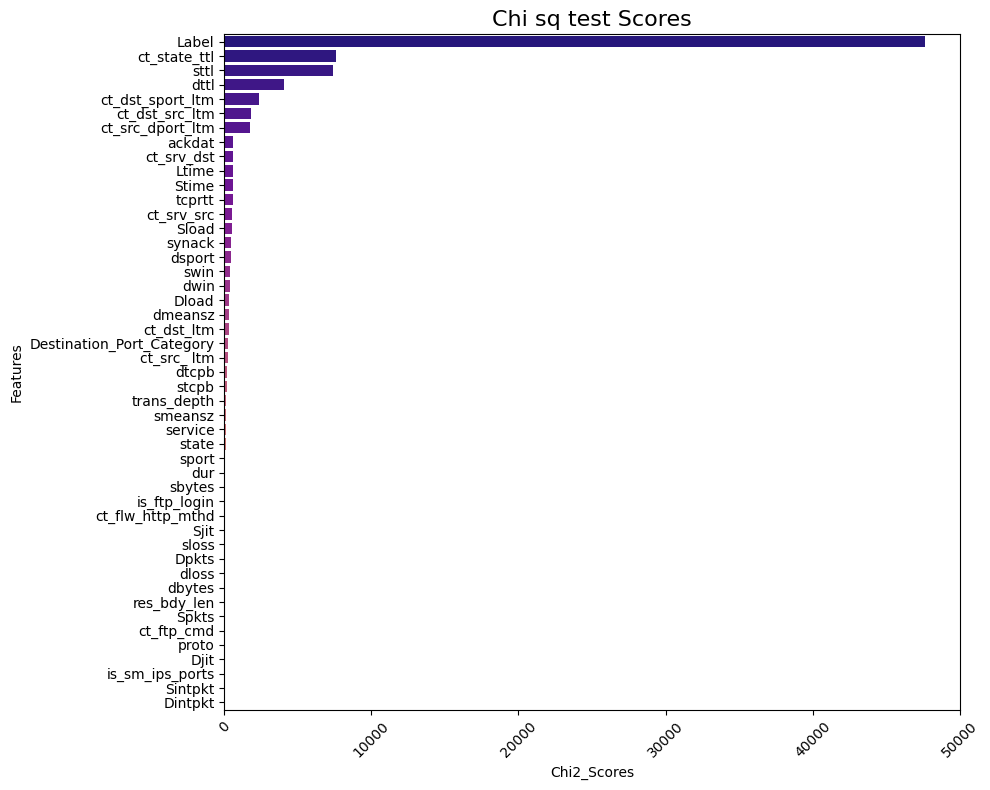

In [151]:
plt.figure(figsize=(10, 8))
# Create the barplot with a colorful palette
sns.barplot(
    x='Chi2_Scores',
    y='Features',
    data=chi2_scores_df,
    palette='plasma'  # try 'coolwarm', 'Spectral', 'Set2', 'plasma' etc.
)
# Add a title
plt.title("Chi sq test Scores", fontsize=16)
# Rotate labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
# Adjust layout and show
plt.tight_layout()
plt.show()

C:\Users\arind\AppData\Local\Temp\ipykernel_14628\1098140766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


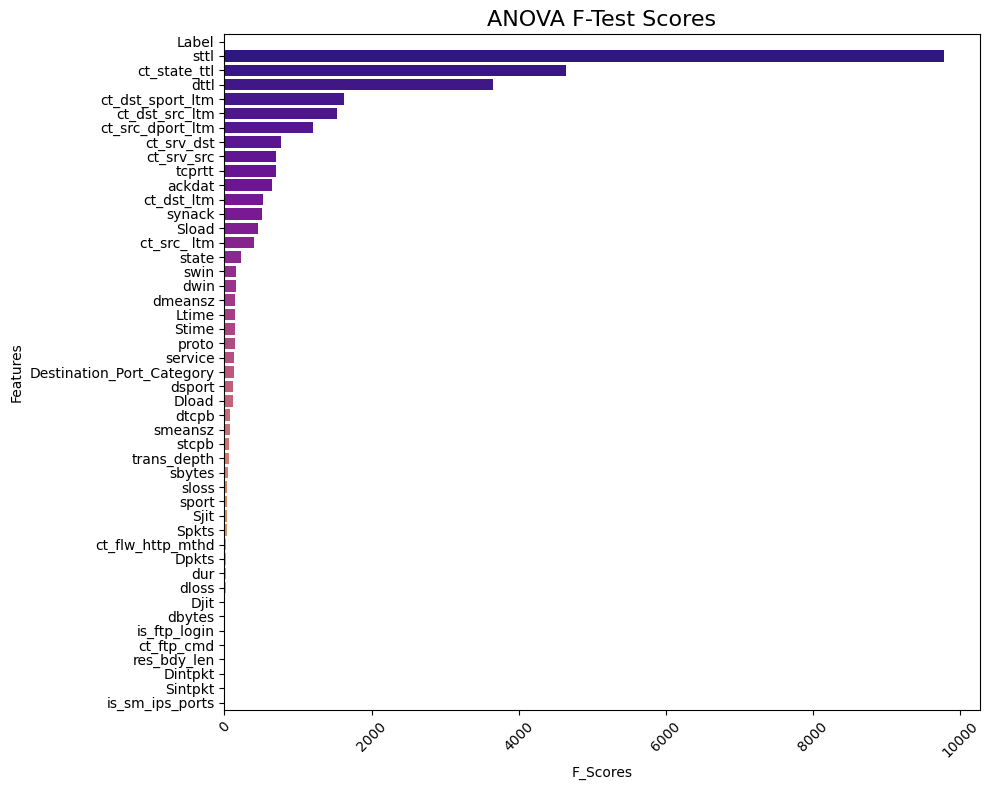

In [152]:
plt.figure(figsize=(10, 8))
# Create the barplot with a colorful palette
sns.barplot(
    x='F_Scores',
    y='Features',
    data=anova_scores_df,
    palette='plasma'  # try 'coolwarm', 'Spectral', 'Set2', 'plasma' etc.
)
# Add a title
plt.title("ANOVA F-Test Scores", fontsize=16)
# Rotate labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
# Adjust layout and show
plt.tight_layout()
plt.show()

In [ ]:
features_MI = ['Ltime','Stime','dsport','dbytes','sbytes','dmeansz','ct_state_ttl',
               'sttl','Dpkts','dttl','smeansz','Sload','Spkts','Dload','Dintpkt','synack',
               'tcprtt','dur','ackdat','dloss','state','Sintpkt','Sjit','sloss',
               'Djit','ct_srv_dst','ct_dst_sport_ltm']

features_Chi2 = ['ct_state_ttl','sttl','dttl','ct_dst_sport_ltm','ct_dst_src_ltm','ct_src_dport_ltm',
                 'ackdat','ct_srv_dst','Ltime','Stime','tcprtt','ct_srv_src','Sload','synack','dsport',
                 'swin','dwin','Dload','dmeansz','ct_dst_ltm','ct_src_ ltm',
                 'dtcpb','stcpb','trans_depth','smeansz','service','state']

features_ANOVA = ['sttl','ct_state_ttl','dttl','ct_dst_sport_ltm','ct_dst_src_ltm','ct_src_dport_ltm',
                  'ct_srv_dst','ct_srv_src','tcprtt','ackdat','ct_dst_ltm','synack','Sload','ct_src_ ltm',
                  'state','swin','dwin','dmeansz','Ltime','Stime','proto','service',
                  'dsport','Dload','dtcpb','smeansz','stcpb','trans_depth']